<a href="https://colab.research.google.com/github/Jake-Lockwood/SeniorDesign/blob/main/Clean_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DO NOT EDIT THIS FILE, Download or copy it**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
#import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

Add the map data below, must be in the format of the CSV file on my github

In [51]:
#TRAJECTORY DATA: No need to change unless it does not include the curved wells
traj = pd.read_csv("https://raw.githubusercontent.com/Jake-Lockwood/SeniorDesign/main/Wellbore%20Trajectories.csv")

#EUR data, change this file. Make sure that the columns are the same names. Does not need all the columns, just the same naming conventions
EURs = pd.read_csv("https://raw.githubusercontent.com/Jake-Lockwood/SeniorDesign/main/Wolfcamp%20A%20EURs.csv")

data = traj.loc[:, ["API_UWI","TVD_FT","Latitude", "Longitude"]]
data.rename(columns={"API_UWI": "API", "TVD_FT": "TVD"}, inplace=True)

EURslim = EURs.loc[:, ["API#", "BO/ft", "GOR", "WOR"]]
EURslim.rename(columns={"API#": "API"}, inplace=True)

data = pd.merge(data, EURslim)

data['Longitude'] = data['Longitude']*-1                                        #If longitudes are not inverted, comment out this line of code
data = data.dropna()

lats = np.arange(min(data['Latitude']), max(data['Latitude']), 0.001)
longs = np.arange(min(data['Longitude']), max(data['Longitude']), 0.001)
xv, yv = np.meshgrid(lats, longs)
xv = xv.flatten()
yv = yv.flatten()
grid = np.concatenate((xv, yv), axis=0)

df1 = pd.DataFrame(xv)
df2 = pd.DataFrame(yv)
dataframe = pd.concat([df1, df2], axis=1)

dataframe.columns = ["Latitude", 'Longitude']
griddata = pd.concat([data, dataframe])

neigh = KNeighborsRegressor(weights = 'distance', n_neighbors=300, p = 1)

Change the map by editing the "type_plot" variable below

Text(0.5, 1.0, 'BO/ft')

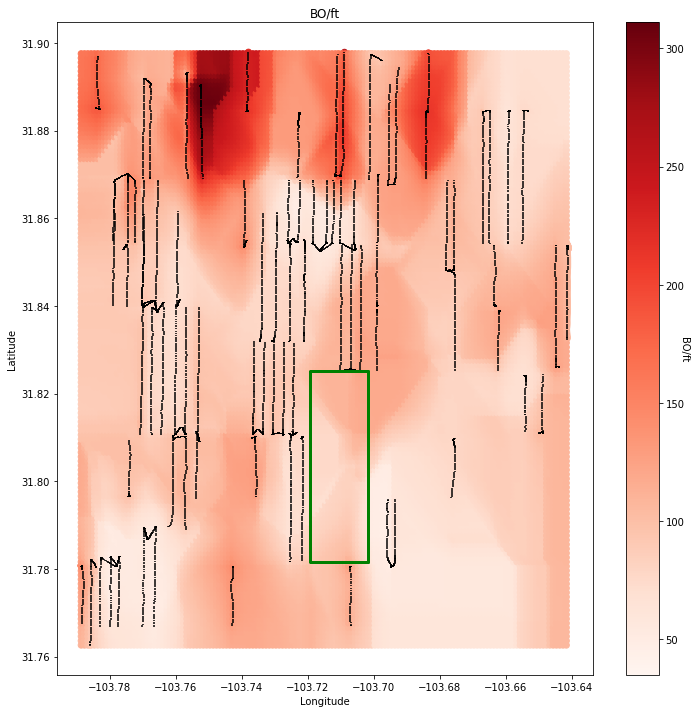

In [52]:
#plotting parameters
#what to plot
type_plot = "BO/ft" #options: "BO/ft", "WOR", "GOR"


fit = neigh.fit(data[["Latitude","Longitude"]], data[type_plot])
griddata[type_plot] = fit.predict(griddata[["Latitude","Longitude"]])

plt.figure(figsize=(12,12))
plt.scatter(griddata["Longitude"], griddata["Latitude"], s=None, c = griddata[type_plot], cmap='Reds')  #Can change cmap parameter, some options: viridis, Blues, Reds, plasma
cbar = plt.colorbar()
cbar.set_label(type_plot, rotation=270)
plt.scatter(data['Longitude'], data['Latitude'], color='black', s=1, marker='|', label=type_plot)

#Lease box
top_left_lat = 31.825181
top_left_long = -103.719216

top_right_lat = 31.825181
top_right_long = -103.7017164

bottom_left_lat = 31.781565
bottom_left_long = -103.719216

bottom_right_lat = 31.781565
bottom_right_long = -103.7017164

left_lat = np.linspace(bottom_left_lat, top_left_lat, 1000)
left_long = np.linspace(bottom_left_long, top_left_long, 1000)
top_lat = np.linspace(top_left_lat, top_right_lat, 1000)
top_long = np.linspace(top_left_long, top_right_long, 1000)
right_lat  = np.linspace(bottom_right_lat, top_right_lat, 1000)
right_long = np.linspace(bottom_right_long, top_right_long, 1000)
bottom_lat = np.linspace(bottom_left_lat, bottom_right_lat, 1000)
bottom_long = np.linspace(bottom_left_long, bottom_right_long, 1000)

lease_lats = np.concatenate((left_lat, top_lat, right_lat, bottom_lat))
lease_longs = np.concatenate((left_long, top_long, right_long, bottom_long))

lease = pd.DataFrame({"lats": lease_lats, "longs": lease_longs})
plt.scatter(lease['longs'], lease['lats'], s=1, color="green")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(type_plot)